In [1]:
%%time
dataset_name = "W19_only"
df_list = "BES_Panel"

%matplotlib inline
%run BES_header.py {dataset_name} {df_list}

# BES_Panel = pd.read_stata( "E:\\Users\\Gamer\\Documents\\GitHub\\BES_analysis\\BES_analysis_data\\W23_only\\BES2019_W23_v23.0.dta" )

Toggle code

2023-05-21 12:53:08,085 WARNING: panel.io.resources - Mimetype declaration for .js files was set to 'text/plain'. This will interefere with serving JS modules. Ensure your system does not override the mimetype declaration and/or contact your system administrator. 
Wall time: 51.7 s


array([5, 2, 2])

In [7]:
pd.Series(index = [0,1,2]).fillna(0)

0    0.0
1    0.0
2    0.0
dtype: float64

In [20]:
# 50% morning, aft 30%, even 20%

,repeat
0,0
1,0
2,0


In [58]:
total_repeats = 1000
period_df = pd.DataFrame(index=[0,1,2],columns=range(0,total_repeats)).fillna(0)


# period_length = pd.Series(index = [0,1,2]).fillna(0)
for repeat in range(0,total_repeats):
    period = 0
    while period <3:
        # roll dice
        period_df.loc[period,repeat]=period_df.loc[period,repeat]+1
        roll_dice = np.random.randint(1,6,4-period)
        # apply rule
#         if roll_dice.sum()<11:
#             period=period+1
        if (roll_dice<4).all():
            period=period+1
        
        
        
# display(period_length)
# 100*period_length/period_length.sum()
period_df.apply(lambda x: x/sum(x)).mean(axis=1)

0    0.451538
1    0.329860
2    0.218602
dtype: float64

In [48]:
(roll_dice<4).all()

False

In [59]:
period_df.mean(axis=1).sum()

14.466

In [60]:
period_df.mean(axis=1)

0    7.181
1    4.577
2    2.708
dtype: float64

In [41]:
# period_df.sum(axis=0).mean()

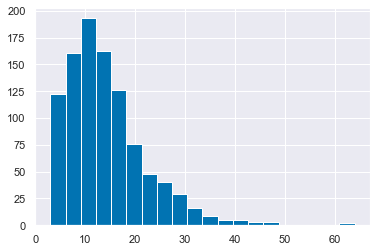

In [68]:
period_df.sum().hist(bins=20)

In [63]:
period_df.sum().min()

3

In [64]:
period_df.sum().mode()

0    10
dtype: int64

In [ ]:
# Tests are what propel you through the day. Fail a test and Morning will become Afternoon.
# Fail another and the sun will set and darkness descend. 

# Test couldn’t be simpler. You roll four six sided dice and if you rolled a 5 or a 6 you’ve passed.
# This means that the antagonist reveals a secret about themselves to their organisation. What is this secret?
# There will be a space on your character sheet to record it.  

# If you don’t roll a 5 or a 6, it means you’ve failed and there is a negative outcome to that prompt.
# Have you sustained an injury? Have you found something out that puts you on edge or renders you immobile? 

# You also lose a die. That means in the afternoon you only roll three dice and in the evening, you only roll two. 

# Fail two tests in the morning and time has passed and you are in the afternoon.
# Fail three tests in the afternoon and the sun sets and you are in the night. 

# Pass or fail tests will yield a discovery about the antagonist at night. There will be a box on the character sheet. 

# If you fail four tests at night the game ends. Have you escaped?
# Has the secret of the town been revealed? What has become of your person? You will find out in the resolutions. 

In [ ]:
# states: Morning 4 dice, Afternoon 3 dice, Evening 2 dice
# Morning -> Afternoon (2 fails)
# Afternoon -> Evening (3 fails)
# Evening -> Game End (4 fails)

# so, really, only a question of the number/distribution of passes in the three phases

In [24]:
game = pd.DataFrame(columns=["Morning Passes","Afternon Passes","Evening Passes"])
max_game_phases = 3
max_dice = 4
succeed_min = 5
repeats=10000
for rep in range(0,repeats):
    phase = 0
    fail = 0
    success = 0
    while phase < max_game_phases:
        # ROLL DICE
        roll_dice = np.random.randint(1,6,max_dice-phase)
        # RESOLVE ROLL
        if (roll_dice<succeed_min).all():
            fail = fail + 1
        else:
            success = success + 1
        # CHECK TO SEE IF PHASE CHANGES
        if fail>(2+phase):
            # record state
            game.loc[rep,game.columns[phase]]=success
            # update/reset counters
            phase = phase + 1
            fail = 0
            success = 0
        

In [25]:
# 
game = game.astype(int)
game["Total Passes"] = np.nan
game["Total Passes"] = game.sum(axis=1).astype(int)
game

,Morning Passes,Afternon Passes,Evening Passes,Total Passes
0,4,0,3,7
1,1,4,3,8
2,14,7,1,22
3,1,3,1,5
4,7,4,5,16
...,...,...,...,...
9995,2,2,3,7
9996,3,1,4,8
9997,3,1,5,9
9998,6,6,4,16


array([[<AxesSubplot:title={'center':'Morning Passes'}>,
        <AxesSubplot:title={'center':'Afternon Passes'}>],
       [<AxesSubplot:title={'center':'Evening Passes'}>,
        <AxesSubplot:title={'center':'Total Passes'}>]], dtype=object)

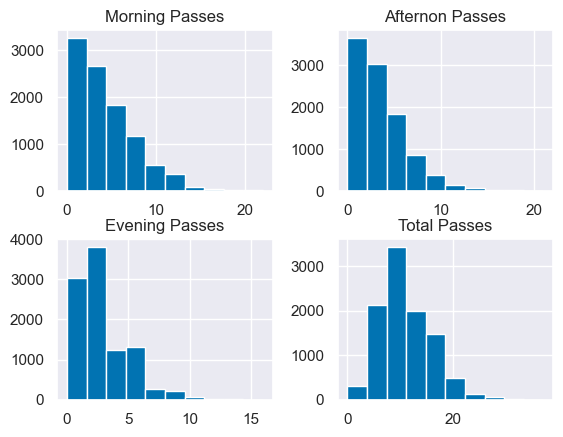

In [27]:
game.hist()

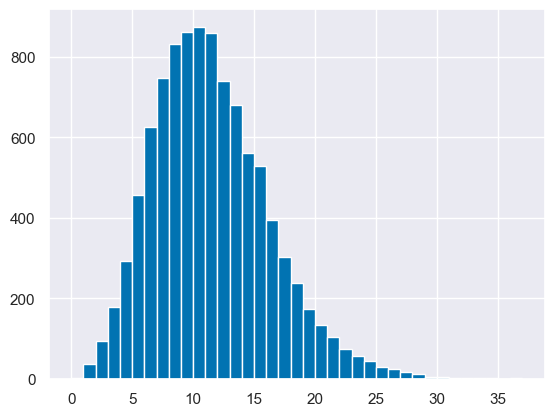

In [36]:
game["Total Passes"].hist(bins=game["Total Passes"].describe().loc['max'].astype(int));

In [40]:
game["Total Passes"].median()

10.0

In [39]:
game["Total Passes"].describe()

count    10000.000000
mean        11.003800
std          4.760531
min          0.000000
25%          8.000000
50%         10.000000
75%         14.000000
max         37.000000
Name: Total Passes, dtype: float64

In [38]:
game["Total Passes"].value_counts().sort_index()
# mode,median is 10 successes, mean is 11
# 3 games out of 10,000 -> 0 successes
# 1 game out of 10,000 -> 37 successes

0       3
1      37
2      93
3     179
4     293
5     456
6     626
7     747
8     832
9     862
10    875
11    860
12    741
13    681
14    561
15    529
16    395
17    304
18    238
19    173
20    133
21    105
22     73
23     57
24     44
25     30
26     25
27     17
28     12
29      5
30      4
31      3
32      3
33      2
34      1
37      1
Name: Total Passes, dtype: int64